ÂºÄÂßãSO2Êï∞ÊçÆÈõÜÂØπÊØîÂàÜÊûê...
Âä†ËΩΩÊï∞ÊçÆÈõÜ...
  ‚úì ÊàêÂäüÂä†ËΩΩ SO2_v=1: 8000 Ë°å, 21 Âàó
  ‚úì ÊàêÂäüÂä†ËΩΩ SO2_v=10: 801 Ë°å, 21 Âàó
  ‚úì ÊàêÂäüÂä†ËΩΩ SO2_v=20: 401 Ë°å, 21 Âàó

Êï∞ÊçÆÈõÜÂü∫Êú¨‰ø°ÊÅØÂØπÊØî

SO2_v=1:
  Êï∞ÊçÆÂΩ¢Áä∂: (8000, 21)
  ÂàóÂêç: ['wavenumber', 't=100k', 't=200k', 't=300k', 't=400k', 't=500k', 't=600k', 't=700k', 't=800k', 't=900k', 't=1000k', 't=1100k', 't=1200k', 't=1300k', 't=1400k', 't=1500k', 't=1600k', 't=1700k', 't=1800k', 't=1900k', 't=2000k']
  Ê∏©Â∫¶ËåÉÂõ¥: 100K - 2000K
  Ê∏©Â∫¶ÁÇπÊï∞: 20
  Êï∞ÂÄºËåÉÂõ¥: 6.83e-33 - 1.83e-18
  Âπ≥ÂùáÂÄº: 5.01e-21
  Ê†áÂáÜÂ∑Æ: 3.54e-20

SO2_v=10:
  Êï∞ÊçÆÂΩ¢Áä∂: (801, 21)
  ÂàóÂêç: ['wavenumber', 't=100k', 't=200k', 't=300k', 't=400k', 't=500k', 't=600k', 't=700k', 't=800k', 't=900k', 't=1000k', 't=1100k', 't=1200k', 't=1300k', 't=1400k', 't=1500k', 't=1600k', 't=1700k', 't=1800k', 't=1900k', 't=2000k']
  Ê∏©Â∫¶ËåÉÂõ¥: 100K - 2000K
  Ê∏©Â∫¶ÁÇπÊï∞: 20
  Êï∞ÂÄºËåÉÂõ¥: 1.02e-32 - 1.15e-18
  Âπ≥ÂùáÂÄº: 5.00e-21
  Ê

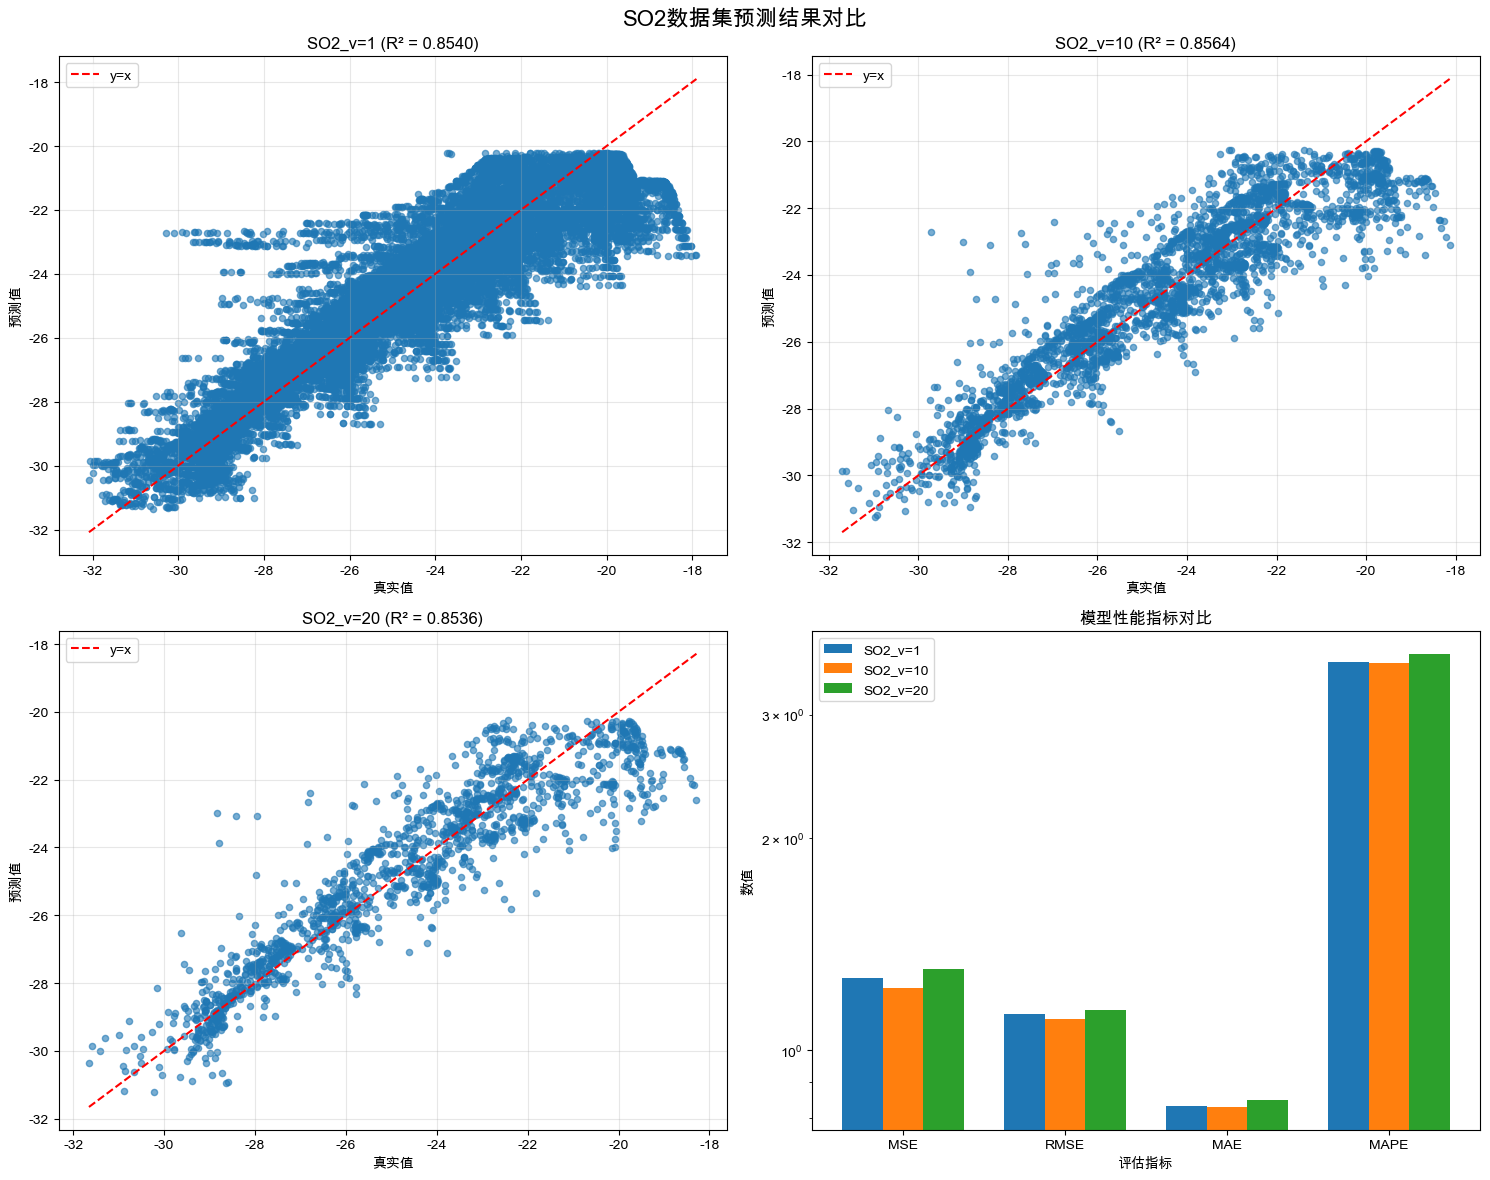

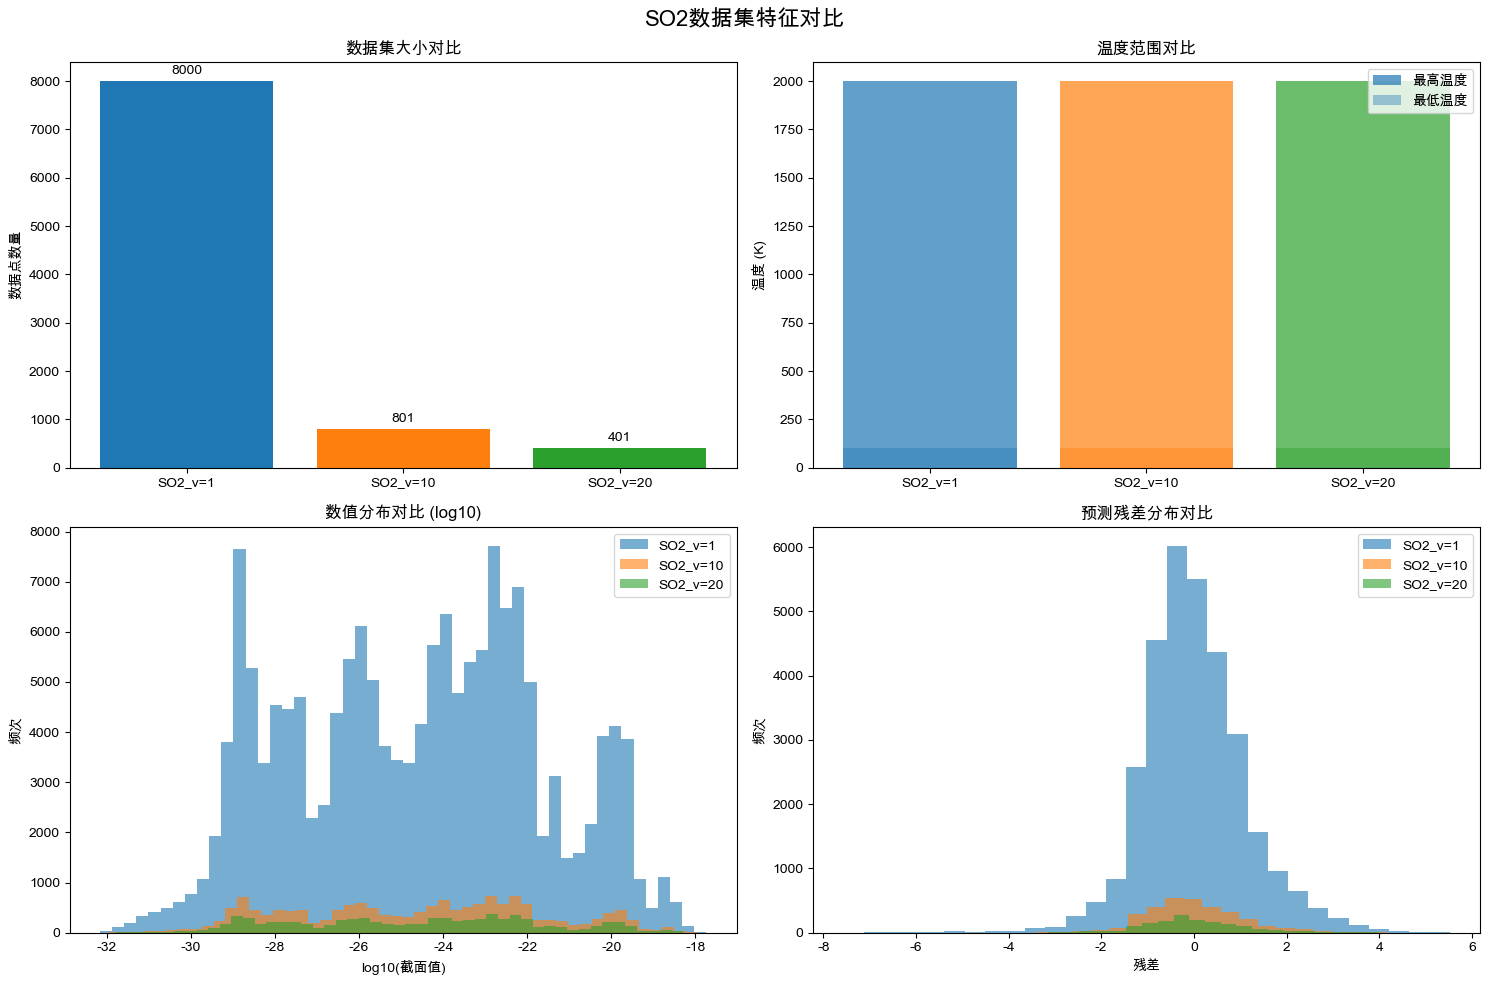


‰øùÂ≠òÁªìÊûú
  ‚úì ‰øùÂ≠òExcelÁªìÊûúÊñá‰ª∂: so2_comparison_results.xlsx

ÂàÜÊûêÂÆåÊàêÔºÅ
ÁîüÊàêÁöÑÊñá‰ª∂:
  - so2_comparison_results.png: È¢ÑÊµãÁªìÊûúÂØπÊØîÂõæ
  - so2_dataset_comparison.png: Êï∞ÊçÆÈõÜÁâπÂæÅÂØπÊØîÂõæ
  - so2_comparison_results.xlsx: ËØ¶ÁªÜÁªìÊûúExcelÊñá‰ª∂

Âª∫ËÆÆ:
  - ÊúÄ‰Ω≥Ê®°Âûã: SO2_v=10 (R¬≤ = 0.8564)
  - Êü•ÁúãÁîüÊàêÁöÑÂõæË°®‰∫ÜËß£Êï∞ÊçÆÈõÜÂ∑ÆÂºÇ
  - Ê£ÄÊü•ExcelÊñá‰ª∂Ëé∑ÂèñËØ¶ÁªÜÊï∞ÂÄºÁªìÊûú


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

class SO2DataAnalyzer:
    def __init__(self):
        self.datasets = {}
        self.results = {}
        
    def load_data(self):
        """Âä†ËΩΩ‰∏â‰∏™SO2Êï∞ÊçÆÈõÜ"""
        print("Âä†ËΩΩÊï∞ÊçÆÈõÜ...")
        
        file_paths = {
            'SO2_v=1': 'so2_v=1.xlsm',
            'SO2_v=10': 'so2_v=10.xlsm', 
            'SO2_v=20': 'so2_v=20.xlsm'
        }
        
        for name, path in file_paths.items():
            try:
                df = pd.read_excel(path)
                self.datasets[name] = df
                print(f"  ‚úì ÊàêÂäüÂä†ËΩΩ {name}: {df.shape[0]} Ë°å, {df.shape[1]} Âàó")
            except FileNotFoundError:
                print(f"  ‚úó Êñá‰ª∂Êú™ÊâæÂà∞: {path}")
                return False
            except Exception as e:
                print(f"  ‚úó Âä†ËΩΩ {path} Êó∂Âá∫Èîô: {str(e)}")
                return False
        
        return len(self.datasets) > 0
    
    def basic_info_comparison(self):
        """Âü∫Êú¨‰ø°ÊÅØÂØπÊØî"""
        print("\n" + "="*60)
        print("Êï∞ÊçÆÈõÜÂü∫Êú¨‰ø°ÊÅØÂØπÊØî")
        print("="*60)
        
        for name, df in self.datasets.items():
            print(f"\n{name}:")
            print(f"  Êï∞ÊçÆÂΩ¢Áä∂: {df.shape}")
            print(f"  ÂàóÂêç: {list(df.columns)}")
            
            # ÂàÜÊûêÊ∏©Â∫¶Âàó
            temp_cols = [col for col in df.columns if col.startswith('t=')]
            if temp_cols:
                temps = [int(col.replace('t=', '').replace('k', '').replace('K', '')) for col in temp_cols]
                print(f"  Ê∏©Â∫¶ËåÉÂõ¥: {min(temps)}K - {max(temps)}K")
                print(f"  Ê∏©Â∫¶ÁÇπÊï∞: {len(temps)}")
            
            # Êï∞ÂÄºÁªüËÆ°
            numeric_cols = df.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 1:
                data_values = df[numeric_cols[1:]].values.flatten()
                data_values = data_values[~np.isnan(data_values)]
                if len(data_values) > 0:
                    print(f"  Êï∞ÂÄºËåÉÂõ¥: {data_values.min():.2e} - {data_values.max():.2e}")
                    print(f"  Âπ≥ÂùáÂÄº: {data_values.mean():.2e}")
                    print(f"  Ê†áÂáÜÂ∑Æ: {data_values.std():.2e}")
    
    def preprocess_data(self):
        """Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ"""
        print("\n" + "="*60)
        print("Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ")
        print("="*60)
        
        for name, df in self.datasets.items():
            print(f"\nÂ§ÑÁêÜ {name}...")
            
            # Ê£ÄÊü•Âπ∂Â§ÑÁêÜÁº∫Â§±ÂÄº
            missing_count = df.isnull().sum().sum()
            if missing_count > 0:
                print(f"  ÂèëÁé∞ {missing_count} ‰∏™Áº∫Â§±ÂÄºÔºå‰ΩøÁî®ÂâçÂêëÂ°´ÂÖÖ")
                df.fillna(method='ffill', inplace=True)
                df.fillna(method='bfill', inplace=True)
            
            # Ê£ÄÊü•Êó†Á©∑ÂÄº
            inf_count = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
            if inf_count > 0:
                print(f"  ÂèëÁé∞ {inf_count} ‰∏™Êó†Á©∑ÂÄºÔºåÊõøÊç¢‰∏∫NaNÂêéÂ°´ÂÖÖ")
                df.replace([np.inf, -np.inf], np.nan, inplace=True)
                df.fillna(method='ffill', inplace=True)
                df.fillna(method='bfill', inplace=True)
            
            print(f"  ‚úì È¢ÑÂ§ÑÁêÜÂÆåÊàê")
    
    def train_models(self):
        """ËÆ≠ÁªÉÊú∫Âô®Â≠¶‰π†Ê®°Âûã"""
        print("\n" + "="*60)
        print("Êú∫Âô®Â≠¶‰π†Ê®°ÂûãËÆ≠ÁªÉ")
        print("="*60)
        
        for name, df in self.datasets.items():
            print(f"\nËÆ≠ÁªÉ {name} Ê®°Âûã...")
            
            try:
                # ÂáÜÂ§áÁâπÂæÅÂíåÁõÆÊ†á
                wavenumber_col = df.columns[0]  # Á¨¨‰∏ÄÂàóÊòØÊ≥¢Êï∞
                temp_cols = [col for col in df.columns if col.startswith('t=')]
                
                if len(temp_cols) == 0:
                    print(f"  ‚úó Êú™ÊâæÂà∞Ê∏©Â∫¶Âàó")
                    continue
                
                # ÂàõÂª∫ÁâπÂæÅÁü©Èòµ
                features_list = []
                targets_list = []
                
                for _, row in df.iterrows():
                    wavenumber = row[wavenumber_col]
                    for temp_col in temp_cols:
                        temp = int(temp_col.replace('t=', '').replace('k', '').replace('K', ''))
                        cross_section = row[temp_col]
                        
                        if not np.isnan(cross_section) and cross_section > 0:
                            features_list.append([wavenumber, temp])
                            targets_list.append(np.log10(cross_section))
                
                if len(features_list) == 0:
                    print(f"  ‚úó Ê≤°ÊúâÊúâÊïàÁöÑËÆ≠ÁªÉÊï∞ÊçÆ")
                    continue
                
                X = np.array(features_list)
                y = np.array(targets_list)
                
                print(f"  ËÆ≠ÁªÉÊï∞ÊçÆÁÇπÊï∞: {len(X)}")
                
                # Êï∞ÊçÆÊ†áÂáÜÂåñ
                scaler = StandardScaler()
                X_scaled = scaler.fit_transform(X)
                
                # Â§öÈ°πÂºèÁâπÂæÅ
                poly = PolynomialFeatures(degree=2, include_bias=False)
                X_poly = poly.fit_transform(X_scaled)
                
                # ÂàíÂàÜËÆ≠ÁªÉÊµãËØïÈõÜ
                X_train, X_test, y_train, y_test = train_test_split(
                    X_poly, y, test_size=0.2, random_state=42
                )
                
                # LassoÂõûÂΩí
                model = Lasso(alpha=0.01, max_iter=2000)
                model.fit(X_train, y_train)
                
                # È¢ÑÊµã
                y_pred = model.predict(X_test)
                
                # ËÆ°ÁÆóËØÑ‰º∞ÊåáÊ†á
                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)
                mae = mean_absolute_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)
                
                # MAPE (Mean Absolute Percentage Error)
                mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
                
                # GME (Geometric Mean Error)
                gme = np.exp(np.mean(np.abs(np.log(np.abs(y_test) + 1e-10) - np.log(np.abs(y_pred) + 1e-10))))
                
                # ‰øùÂ≠òÁªìÊûú
                self.results[name] = {
                    'model': model,
                    'scaler': scaler,
                    'poly': poly,
                    'y_test': y_test,
                    'y_pred': y_pred,
                    'mse': mse,
                    'rmse': rmse,
                    'mae': mae,
                    'r2': r2,
                    'mape': mape,
                    'gme': gme
                }
                
                print(f"  ‚úì Ê®°ÂûãËÆ≠ÁªÉÂÆåÊàê")
                print(f"    MSE: {mse:.4e}")
                print(f"    RMSE: {rmse:.4e}")
                print(f"    MAE: {mae:.4e}")
                print(f"    R¬≤: {r2:.4f}")
                print(f"    MAPE: {mape:.2f}%")
                print(f"    GME: {gme:.4e}")
                
            except Exception as e:
                print(f"  ‚úó ËÆ≠ÁªÉÂ§±Ë¥•: {str(e)}")
    
    def create_visualizations(self):
        """ÂàõÂª∫ÂèØËßÜÂåñÂõæË°®"""
        print("\n" + "="*60)
        print("ÁîüÊàêÂèØËßÜÂåñÂõæË°®")
        print("="*60)
        
        # 1. È¢ÑÊµãÁªìÊûúÊï£ÁÇπÂõæÂØπÊØî
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('SO2Êï∞ÊçÆÈõÜÈ¢ÑÊµãÁªìÊûúÂØπÊØî', fontsize=16, fontweight='bold')
        
        plot_idx = 0
        for name, result in self.results.items():
            if plot_idx < 3:
                row, col = plot_idx // 2, plot_idx % 2
                ax = axes[row, col]
                
                y_test = result['y_test']
                y_pred = result['y_pred']
                
                ax.scatter(y_test, y_pred, alpha=0.6, s=20)
                ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='y=x')
                ax.set_xlabel('ÁúüÂÆûÂÄº')
                ax.set_ylabel('È¢ÑÊµãÂÄº')
                ax.set_title(f'{name} (R¬≤ = {result["r2"]:.4f})')
                ax.legend()
                ax.grid(True, alpha=0.3)
                plot_idx += 1
        
        # ÊÄßËÉΩÊåáÊ†áÂØπÊØî
        if len(self.results) > 1:
            ax = axes[1, 1]
            metrics = ['MSE', 'RMSE', 'MAE', 'MAPE']
            x_pos = np.arange(len(metrics))
            width = 0.25
            
            colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
            for i, (name, result) in enumerate(self.results.items()):
                values = [result['mse'], result['rmse'], result['mae'], result['mape']]
                ax.bar(x_pos + i*width, values, width, label=name, color=colors[i % len(colors)])
            
            ax.set_xlabel('ËØÑ‰º∞ÊåáÊ†á')
            ax.set_ylabel('Êï∞ÂÄº')
            ax.set_title('Ê®°ÂûãÊÄßËÉΩÊåáÊ†áÂØπÊØî')
            ax.set_xticks(x_pos + width)
            ax.set_xticklabels(metrics)
            ax.legend()
            ax.set_yscale('log')
        
        plt.tight_layout()
        plt.savefig('so2_comparison_results.png', dpi=300, bbox_inches='tight')
        print("  ‚úì ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûúÂØπÊØîÂõæ: so2_comparison_results.png")
        
        # 2. Êï∞ÊçÆÈõÜËßÑÊ®°ÂíåÂàÜÂ∏ÉÂØπÊØî
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('SO2Êï∞ÊçÆÈõÜÁâπÂæÅÂØπÊØî', fontsize=16, fontweight='bold')
        
        # Êï∞ÊçÆÈõÜÂ§ßÂ∞èÂØπÊØî
        ax1 = axes[0, 0]
        names = list(self.datasets.keys())
        sizes = [df.shape[0] for df in self.datasets.values()]
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
        bars = ax1.bar(names, sizes, color=colors)
        ax1.set_title('Êï∞ÊçÆÈõÜÂ§ßÂ∞èÂØπÊØî')
        ax1.set_ylabel('Êï∞ÊçÆÁÇπÊï∞Èáè')
        for bar, size in zip(bars, sizes):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(sizes)*0.01, 
                    str(size), ha='center', va='bottom')
        
        # Ê∏©Â∫¶ËåÉÂõ¥ÂØπÊØî
        ax2 = axes[0, 1]
        temp_ranges = []
        for name, df in self.datasets.items():
            temp_cols = [col for col in df.columns if col.startswith('t=')]
            if temp_cols:
                temps = [int(col.replace('t=', '').replace('k', '').replace('K', '')) for col in temp_cols]
                temp_ranges.append((min(temps), max(temps)))
            else:
                temp_ranges.append((0, 0))
        
        x_pos = np.arange(len(names))
        min_temps = [r[0] for r in temp_ranges]
        max_temps = [r[1] for r in temp_ranges]
        
        ax2.bar(x_pos, max_temps, color=colors, alpha=0.7, label='ÊúÄÈ´òÊ∏©Â∫¶')
        ax2.bar(x_pos, min_temps, color=colors, alpha=0.4, label='ÊúÄ‰ΩéÊ∏©Â∫¶')
        ax2.set_title('Ê∏©Â∫¶ËåÉÂõ¥ÂØπÊØî')
        ax2.set_ylabel('Ê∏©Â∫¶ (K)')
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels(names)
        ax2.legend()
        
        # Êï∞ÂÄºÂàÜÂ∏ÉÂØπÊØî
        ax3 = axes[1, 0]
        for i, (name, df) in enumerate(self.datasets.items()):
            numeric_cols = df.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 1:
                data_values = df[numeric_cols[1:]].values.flatten()
                data_values = data_values[~np.isnan(data_values)]
                if len(data_values) > 0:
                    ax3.hist(np.log10(data_values + 1e-50), bins=50, alpha=0.6, 
                            label=name, color=colors[i])
        ax3.set_title('Êï∞ÂÄºÂàÜÂ∏ÉÂØπÊØî (log10)')
        ax3.set_xlabel('log10(Êà™Èù¢ÂÄº)')
        ax3.set_ylabel('È¢ëÊ¨°')
        ax3.legend()
        
        # ÊÆãÂ∑ÆÂàÜÂ∏ÉÂØπÊØî
        ax4 = axes[1, 1]
        for i, (name, result) in enumerate(self.results.items()):
            residuals = result['y_test'] - result['y_pred']
            ax4.hist(residuals, bins=30, alpha=0.6, label=name, color=colors[i])
        ax4.set_title('È¢ÑÊµãÊÆãÂ∑ÆÂàÜÂ∏ÉÂØπÊØî')
        ax4.set_xlabel('ÊÆãÂ∑Æ')
        ax4.set_ylabel('È¢ëÊ¨°')
        ax4.legend()
        
        plt.tight_layout()
        plt.savefig('so2_dataset_comparison.png', dpi=300, bbox_inches='tight')
        print("  ‚úì ‰øùÂ≠òÊï∞ÊçÆÈõÜÁâπÂæÅÂØπÊØîÂõæ: so2_dataset_comparison.png")
        
        plt.show()
    
    def save_results_to_excel(self):
        """‰øùÂ≠òÁªìÊûúÂà∞ExcelÊñá‰ª∂"""
        print("\n" + "="*60)
        print("‰øùÂ≠òÁªìÊûú")
        print("="*60)
        
        with pd.ExcelWriter('so2_comparison_results.xlsx', engine='openpyxl') as writer:
            # Âü∫Êú¨‰ø°ÊÅØÊ±áÊÄª
            summary_data = []
            for name, df in self.datasets.items():
                temp_cols = [col for col in df.columns if col.startswith('t=')]
                temps = []
                if temp_cols:
                    temps = [int(col.replace('t=', '').replace('k', '').replace('K', '')) for col in temp_cols]
                
                numeric_cols = df.select_dtypes(include=[np.number]).columns
                data_values = df[numeric_cols[1:]].values.flatten() if len(numeric_cols) > 1 else []
                data_values = data_values[~np.isnan(data_values)] if len(data_values) > 0 else []
                
                summary_data.append({
                    'Êï∞ÊçÆÈõÜ': name,
                    'Êï∞ÊçÆÁÇπÊï∞': df.shape[0],
                    'ÁâπÂæÅÊï∞': df.shape[1],
                    'ÊúÄ‰ΩéÊ∏©Â∫¶(K)': min(temps) if temps else 'N/A',
                    'ÊúÄÈ´òÊ∏©Â∫¶(K)': max(temps) if temps else 'N/A',
                    'ÊúÄÂ∞èÂÄº': f"{data_values.min():.2e}" if len(data_values) > 0 else 'N/A',
                    'ÊúÄÂ§ßÂÄº': f"{data_values.max():.2e}" if len(data_values) > 0 else 'N/A',
                    'Âπ≥ÂùáÂÄº': f"{data_values.mean():.2e}" if len(data_values) > 0 else 'N/A'
                })
            
            summary_df = pd.DataFrame(summary_data)
            summary_df.to_excel(writer, sheet_name='Êï∞ÊçÆÈõÜÊ¶ÇËßà', index=False)
            
            # Ê®°ÂûãÊÄßËÉΩÂØπÊØî
            if self.results:
                performance_data = []
                for name, result in self.results.items():
                    performance_data.append({
                        'Êï∞ÊçÆÈõÜ': name,
                        'MSE': f"{result['mse']:.4e}",
                        'RMSE': f"{result['rmse']:.4e}",
                        'MAE': f"{result['mae']:.4e}",
                        'R¬≤': f"{result['r2']:.4f}",
                        'MAPE(%)': f"{result['mape']:.2f}",
                        'GME': f"{result['gme']:.4e}"
                    })
                
                performance_df = pd.DataFrame(performance_data)
                performance_df.to_excel(writer, sheet_name='Ê®°ÂûãÊÄßËÉΩÂØπÊØî', index=False)
            
            # ‰øùÂ≠òÂéüÂßãÊï∞ÊçÆ
            for name, df in self.datasets.items():
                sheet_name = f'ÂéüÂßãÊï∞ÊçÆ_{name.replace("=", "_")}'
                df.to_excel(writer, sheet_name=sheet_name, index=False)
        
        print("  ‚úì ‰øùÂ≠òExcelÁªìÊûúÊñá‰ª∂: so2_comparison_results.xlsx")
    
    def run_complete_analysis(self):
        """ËøêË°åÂÆåÊï¥ÁöÑÂØπÊØîÂàÜÊûê"""
        print("ÂºÄÂßãSO2Êï∞ÊçÆÈõÜÂØπÊØîÂàÜÊûê...")
        print("="*60)
        
        if not self.load_data():
            return
        
        self.basic_info_comparison()
        self.preprocess_data()
        self.train_models()
        self.create_visualizations()
        self.save_results_to_excel()
        
        print("\n" + "="*60)
        print("ÂàÜÊûêÂÆåÊàêÔºÅ")
        print("="*60)
        print("ÁîüÊàêÁöÑÊñá‰ª∂:")
        print("  - so2_comparison_results.png: È¢ÑÊµãÁªìÊûúÂØπÊØîÂõæ")
        print("  - so2_dataset_comparison.png: Êï∞ÊçÆÈõÜÁâπÂæÅÂØπÊØîÂõæ")
        print("  - so2_comparison_results.xlsx: ËØ¶ÁªÜÁªìÊûúExcelÊñá‰ª∂")
        print("\nÂª∫ËÆÆ:")
        if self.results:
            best_model = max(self.results.items(), key=lambda x: x[1]['r2'])
            print(f"  - ÊúÄ‰Ω≥Ê®°Âûã: {best_model[0]} (R¬≤ = {best_model[1]['r2']:.4f})")
        print("  - Êü•ÁúãÁîüÊàêÁöÑÂõæË°®‰∫ÜËß£Êï∞ÊçÆÈõÜÂ∑ÆÂºÇ")
        print("  - Ê£ÄÊü•ExcelÊñá‰ª∂Ëé∑ÂèñËØ¶ÁªÜÊï∞ÂÄºÁªìÊûú")

if __name__ == "__main__":
    analyzer = SO2DataAnalyzer()
    analyzer.run_complete_analysis()

üì• Loading datasets...
  ‚úì Loaded SO2_v=1: (8000, 21)
  ‚úì Loaded SO2_v=10: (801, 21)
  ‚úì Loaded SO2_v=20: (401, 21)

üöÄ Training models...

SO2_v=1:
  ‚úì MSE: 0.1341, RMSE: 0.3662, MAE: 0.2285, R¬≤: 0.9845, MAPE: 0.91%, GME: 1.0092

SO2_v=10:
  ‚úì MSE: 1.1956, RMSE: 1.0935, MAE: 0.8347, R¬≤: 0.8597, MAPE: 3.57%, GME: 1.0361

SO2_v=20:
  ‚úì MSE: 1.2869, RMSE: 1.1344, MAE: 0.8384, R¬≤: 0.8555, MAPE: 3.65%, GME: 1.0366

üìä Plotting prediction results...


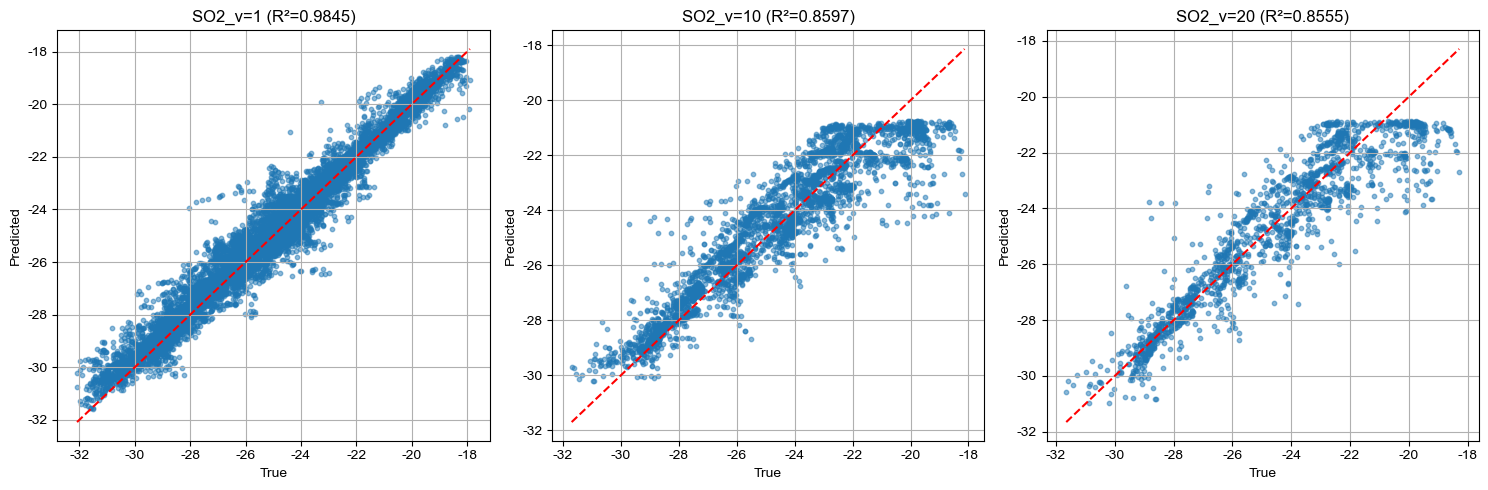

  ‚úì Saved: so2_model_predictions.png


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# üîß Â∑•ÂÖ∑ÂáΩÊï∞ÔºöÊûÑÂª∫Â∏¶ÊúâÂ§öÈ°πÂºèÂíåÊ†áÂáÜÂåñÁöÑ pipeline
def make_poly_mlp(model, degree=2):
    return make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        StandardScaler(),
        model
    )

# üåü ‰∏ªÁ±ª
class SO2DataAnalyzer:
    def __init__(self):
        self.datasets = {}
        self.results = {}

    def load_data(self):
        print("üì• Loading datasets...")
        file_paths = {
            'SO2_v=1': 'so2_v=1.xlsm',
            'SO2_v=10': 'so2_v=10.xlsm', 
            'SO2_v=20': 'so2_v=20.xlsm'
        }
        for name, path in file_paths.items():
            try:
                df = pd.read_excel(path)
                self.datasets[name] = df
                print(f"  ‚úì Loaded {name}: {df.shape}")
            except Exception as e:
                print(f"  ‚úó Failed to load {name}: {e}")
                return False
        return True

    def preprocess_data(self):
        for name, df in self.datasets.items():
            df.replace([np.inf, -np.inf], np.nan, inplace=True)
            df.fillna(method='ffill', inplace=True)
            df.fillna(method='bfill', inplace=True)
            self.datasets[name] = df

    def train_models(self):
        print("\nüöÄ Training models...")
        for name, df in self.datasets.items():
            print(f"\n{name}:")

            try:
                wavenumber_col = df.columns[0]
                temp_cols = [col for col in df.columns if col.startswith('t=')]

                X, y = [], []
                for _, row in df.iterrows():
                    wavenumber = row[wavenumber_col]
                    for temp_col in temp_cols:
                        temp = int(temp_col.replace('t=', '').replace('k', ''))
                        value = row[temp_col]
                        if not np.isnan(value) and value > 0:
                            X.append([wavenumber, temp])
                            y.append(np.log10(value))

                X = np.array(X)
                y = np.array(y)

                if len(X) == 0:
                    print("  ‚úó No valid data")
                    continue

                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                model = make_poly_mlp(
                    MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32), max_iter=1000, random_state=1),
                    degree=2
                )
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)
                mae = mean_absolute_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)
                mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
                gme = np.exp(np.mean(np.abs(np.log(np.abs(y_test + 1e-10)) - np.log(np.abs(y_pred + 1e-10)))))

                self.results[name] = {
                    'y_test': y_test,
                    'y_pred': y_pred,
                    'mse': mse,
                    'rmse': rmse,
                    'mae': mae,
                    'r2': r2,
                    'mape': mape,
                    'gme': gme
                }

                print(f"  ‚úì MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R¬≤: {r2:.4f}, MAPE: {mape:.2f}%, GME: {gme:.4f}")

            except Exception as e:
                print(f"  ‚úó Error during training: {e}")

    def plot_results(self):
        print("\nüìä Plotting prediction results...")
        plt.figure(figsize=(15, 5))
        for i, (name, result) in enumerate(self.results.items()):
            plt.subplot(1, 3, i + 1)
            plt.scatter(result['y_test'], result['y_pred'], alpha=0.5, s=10)
            plt.plot([min(result['y_test']), max(result['y_test'])],
                     [min(result['y_test']), max(result['y_test'])], 'r--')
            plt.xlabel('True')
            plt.ylabel('Predicted')
            plt.title(f'{name} (R¬≤={result["r2"]:.4f})')
            plt.grid(True)
        plt.tight_layout()
        plt.savefig("so2_model_predictions.png", dpi=300)
        plt.show()
        print("  ‚úì Saved: so2_model_predictions.png")

    def run(self):
        if not self.load_data():
            print("‚ùå Cannot proceed without data.")
            return
        self.preprocess_data()
        self.train_models()
        self.plot_results()

if __name__ == "__main__":
    analyzer = SO2DataAnalyzer()
    analyzer.run()


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.507e+04, tolerance: 1.280e+01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.605e+03, tolerance: 1.282e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.354e+03, toler

    Dataset       MSE      RMSE       MAE            R2
0   H2S v=1  2.244312  1.498103  1.442098 -4.716087e+39
1  H2S v=10  2.141162  1.463271  1.407291 -4.519370e+39
2  H2S v=20  2.039747  1.428197  1.368085 -4.348842e+39


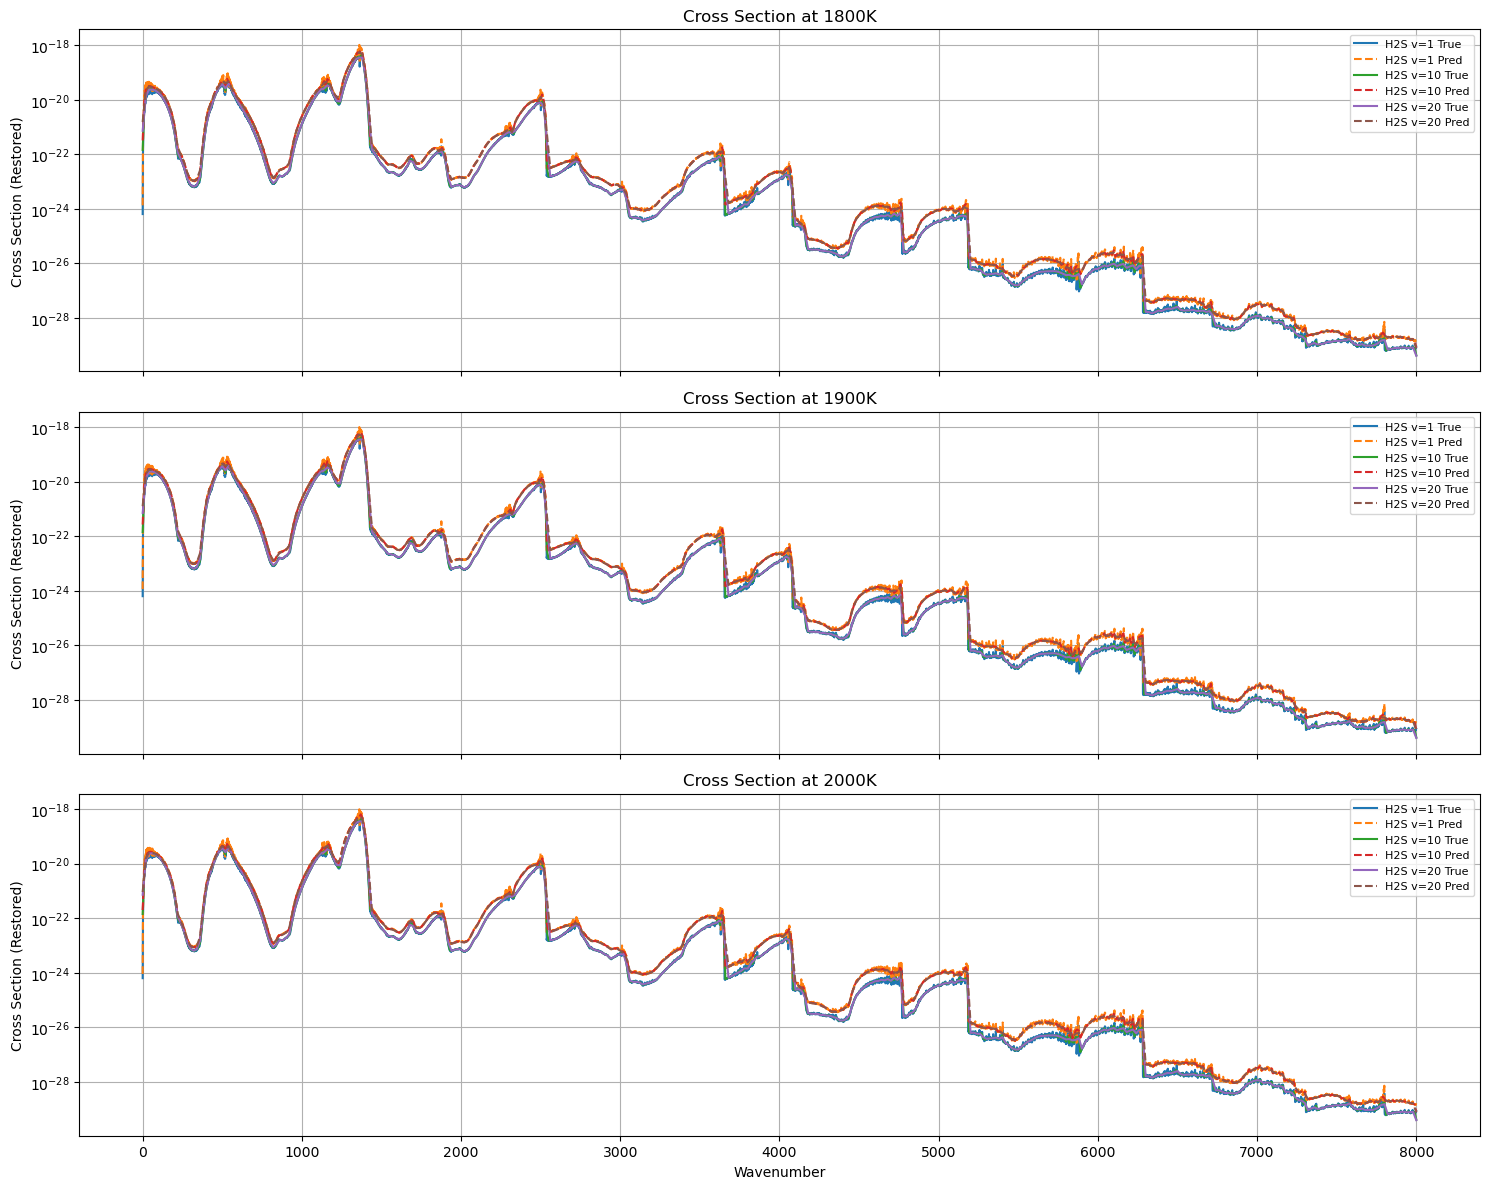

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ========== Êï∞ÊçÆÈõÜË∑ØÂæÑ ==========
datasets = {
    'H2S v=1': 'so2_v=1.xlsm',
    'H2S v=10': 'so2_v=10.xlsm',
    'H2S v=20': 'so2_v=20.xlsm'
}

# ========== ÂÆö‰πâÂáΩÊï∞ÔºöÊ†áÂáÜÂåñ + ËÆ≠ÁªÉ + È¢ÑÊµã + ÂèçÂΩí‰∏ÄÂåñ ==========
def process_dataset(name, file):
    # ËØªÂèñÊï∞ÊçÆ
    df = pd.read_excel(file)
    df = df.rename(columns={'number': 'wavenumber'})
    
    # ÂàíÂàÜËÆ≠ÁªÉ/ÊµãËØï (1800, 1900, 2000K Áî®‰ΩúÊµãËØï)
    columns_to_exclude = ['t=1800k', 't=1900k', 't=2000k']
    columns_to_normalize = [col for col in df.columns if col.startswith('t=') and col not in columns_to_exclude]

    # ÊåâË°åÊ†áÂáÜÂåñ
    data_to_normalize = df[columns_to_normalize].copy()
    row_means = data_to_normalize.mean(axis=1)
    row_stds = data_to_normalize.std(axis=1)
    df_scaled = (data_to_normalize.subtract(row_means, axis=0)).divide(row_stds, axis=0)

    # ‰øùÂ≠òÁªüËÆ°Èáè
    df_stats = pd.DataFrame({
        'wavenumber': df['wavenumber'],
        'row_mean': row_means,
        'row_std': row_stds
    }).set_index('wavenumber')

    # ÊãºÊé•Ê†áÂáÜÂåñÂêéÁöÑËÆ≠ÁªÉÊï∞ÊçÆ
    train_df = pd.concat([df[['wavenumber']], df_scaled], axis=1)

    # ËΩ¨ÊàêÈïøË°®
    long_df = pd.melt(
        train_df,
        id_vars='wavenumber',
        value_vars=[col for col in train_df.columns if col.startswith('t=')],
        var_name='temperature',
        value_name='cross_section'
    )
    long_df['temperature'] = long_df['temperature'].str.replace('t=', '', regex=False).str.replace('k', '', regex=False).astype(int)

    # ËÆ≠ÁªÉ/ÊµãËØïÈõÜÂàíÂàÜ
    test_df = df[['wavenumber'] + columns_to_exclude].rename(columns={'number': 'wavenumber'})
    test_long_df = pd.melt(
        test_df,
        id_vars='wavenumber',
        value_vars=columns_to_exclude,
        var_name='temperature',
        value_name='cross_section'
    )
    test_long_df['temperature'] = test_long_df['temperature'].str.replace('t=', '', regex=False).str.replace('k', '', regex=False).astype(int)

    X_train, y_train = long_df[['wavenumber', 'temperature']], long_df['cross_section']
    X_test, y_test = test_long_df[['wavenumber', 'temperature']], test_long_df['cross_section']

    # Ê®°Âûã
    model = make_pipeline(
        PolynomialFeatures(degree=6, include_bias=False),
        Lasso(alpha=1.0, max_iter=5000)
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûú
    test_long_df['predicted'] = y_pred

    # ÂèçÂΩí‰∏ÄÂåñ
    cross_section_restored = []
    predicted_restored = []
    for idx, row in test_long_df.iterrows():
        wnum = row['wavenumber']
        mean = df_stats.loc[wnum, 'row_mean']
        std = df_stats.loc[wnum, 'row_std']
        cs_restored = row['cross_section'] * std + mean
        pred_restored = row['predicted'] * std + mean
        cross_section_restored.append(cs_restored)
        predicted_restored.append(pred_restored)

    test_long_df['cross_section_restored'] = cross_section_restored
    test_long_df['predicted_restored'] = predicted_restored

    # ËÆ°ÁÆóËØØÂ∑ÆÊåáÊ†á
    mse = mean_squared_error(test_long_df['cross_section'], test_long_df['predicted'])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_long_df['cross_section'], test_long_df['predicted'])
    r2 = r2_score(test_long_df['cross_section'], test_long_df['predicted'])

    metrics = {'Dataset': name, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}
    return test_long_df, metrics

# ========== Âæ™ÁéØÂ§ÑÁêÜÊâÄÊúâÊï∞ÊçÆÈõÜ ==========
results = {}
metrics_list = []
for name, file in datasets.items():
    df_result, metric = process_dataset(name, file)
    results[name] = df_result
    metrics_list.append(metric)

# ÊâìÂç∞ËØØÂ∑ÆÊåáÊ†á
metrics_df = pd.DataFrame(metrics_list)
print(metrics_df)

# ========== ÁîªÂØπÊØîÂõæ ==========
temps = [1800, 1900, 2000]
fig, axs = plt.subplots(len(temps), 1, figsize=(15, 12), sharex=True)

for i, temp in enumerate(temps):
    ax = axs[i]
    for name, df in results.items():
        subset = df[df['temperature'] == temp]
        ax.plot(subset['wavenumber'], subset['cross_section_restored'], label=f'{name} True')
        ax.plot(subset['wavenumber'], subset['predicted_restored'], linestyle='--', label=f'{name} Pred')
    ax.set_title(f'Cross Section at {temp}K')
    ax.set_ylabel('Cross Section (Restored)')
    ax.legend(fontsize=8)
    ax.grid(True)
    ax.set_yscale('log')

axs[-1].set_xlabel('Wavenumber')
plt.tight_layout()
plt.show()

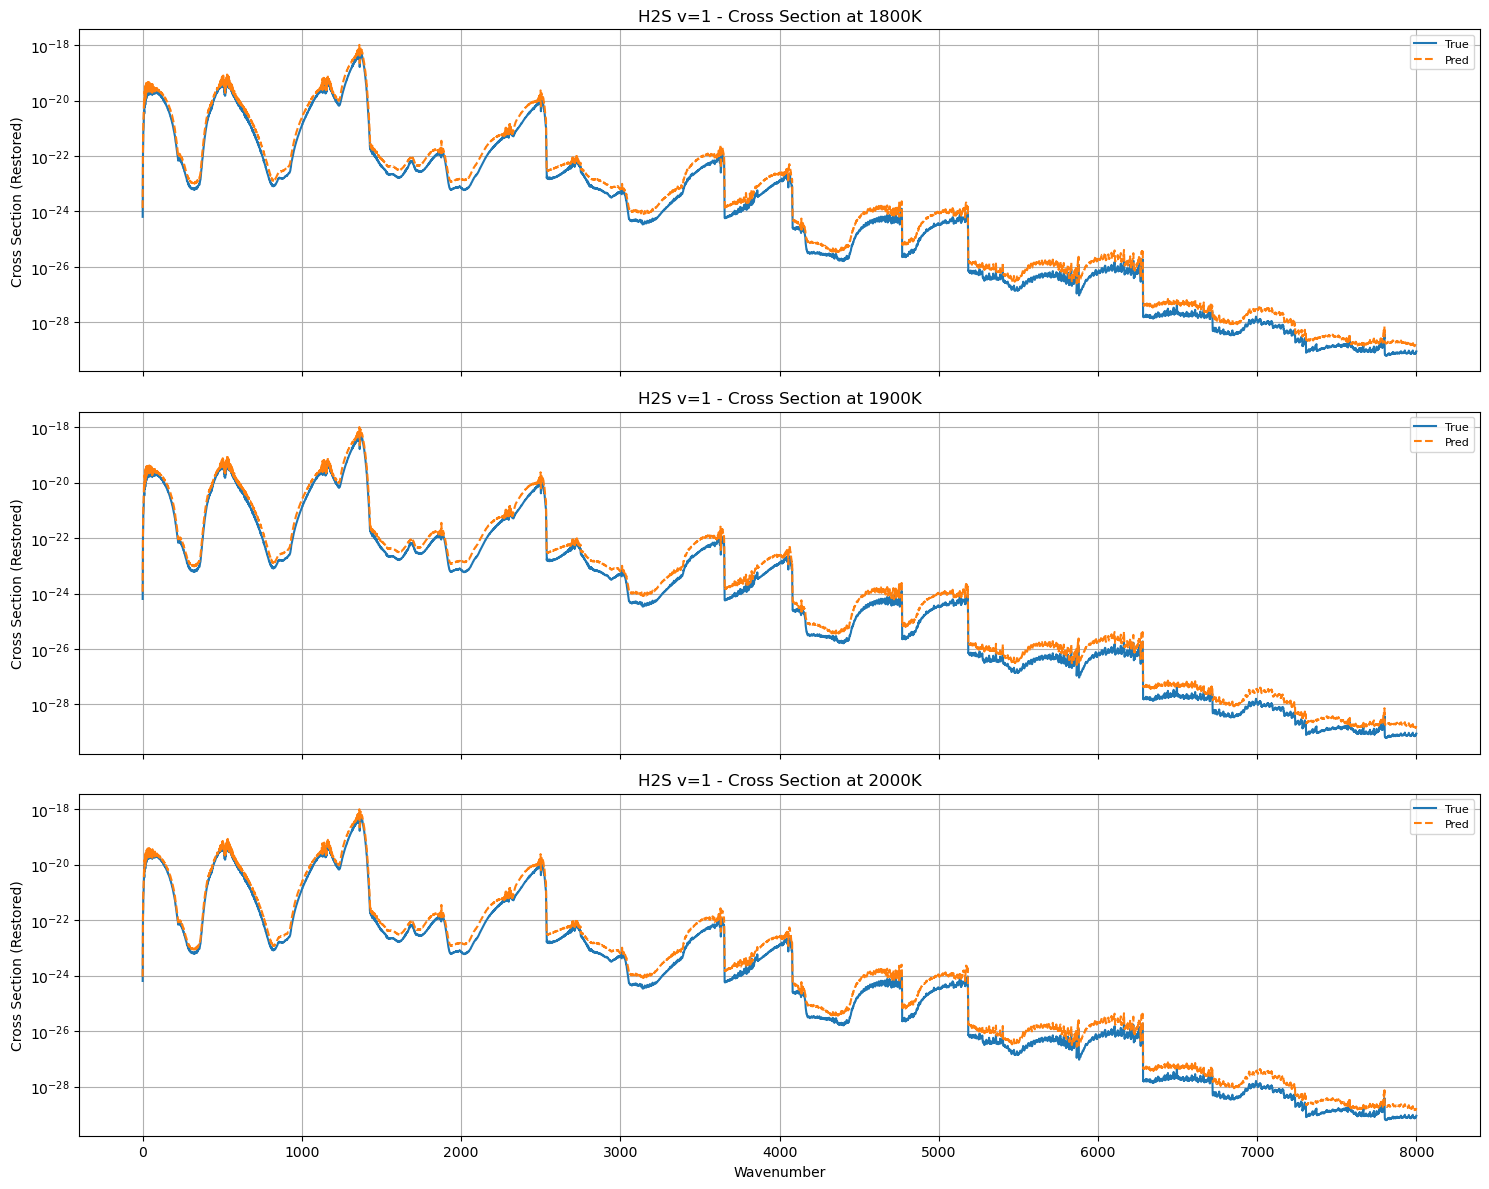

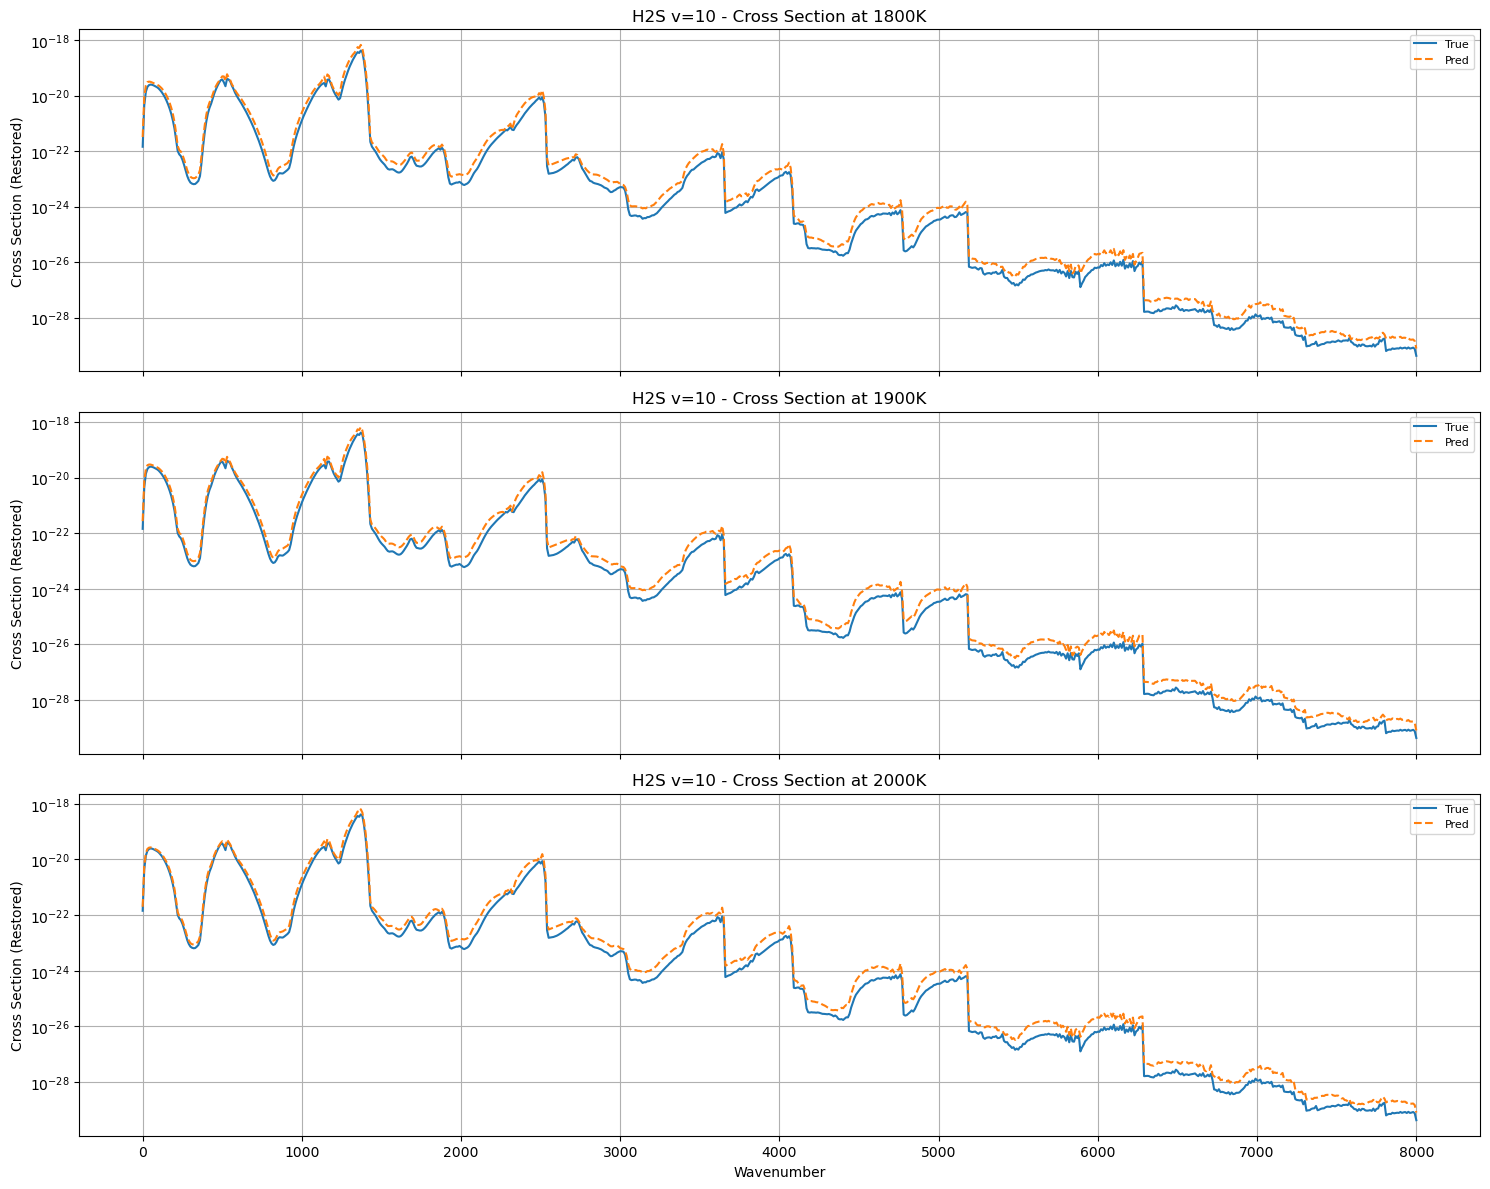

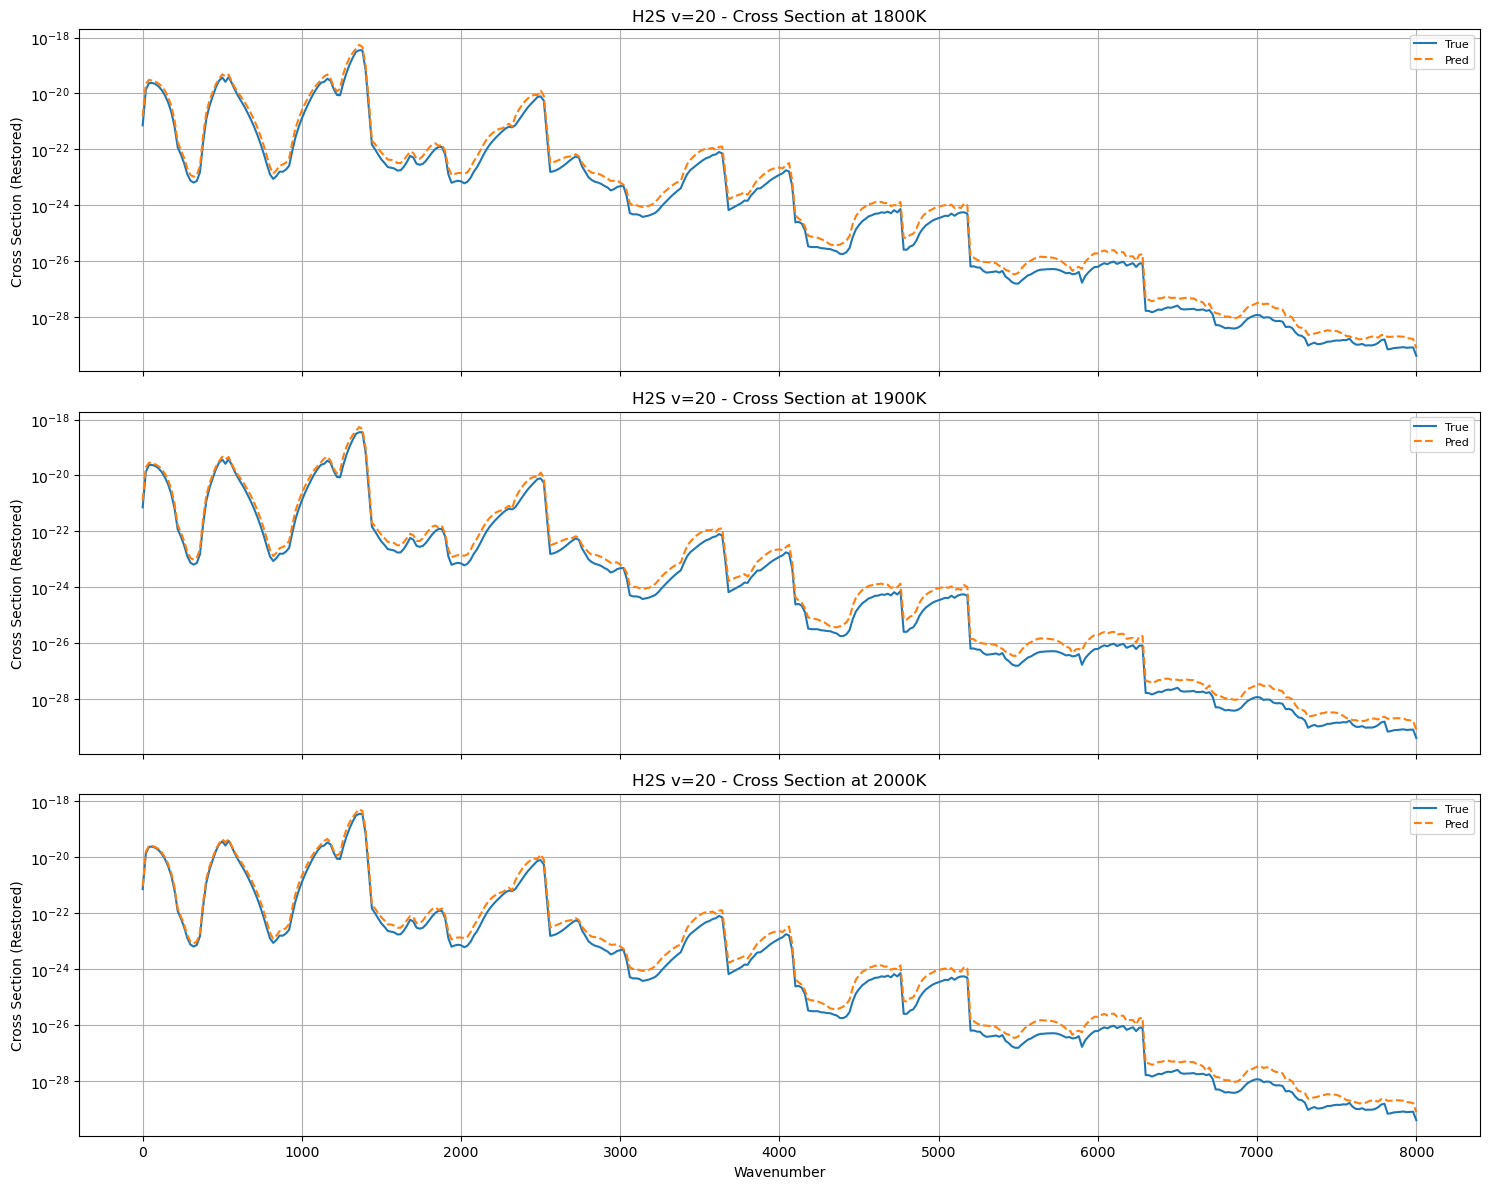

In [3]:
# ========== ÊØè‰∏™Êï∞ÊçÆÈõÜÂçïÁã¨Áîª‰∏ÄÂº†Âõæ ==========
temps = [1800, 1900, 2000]

for name, df in results.items():
    fig, axs = plt.subplots(len(temps), 1, figsize=(15, 12), sharex=True)

    for i, temp in enumerate(temps):
        ax = axs[i]
        subset = df[df['temperature'] == temp]
        ax.plot(subset['wavenumber'], subset['cross_section_restored'], label='True')
        ax.plot(subset['wavenumber'], subset['predicted_restored'], linestyle='--', label='Pred')
        ax.set_title(f'{name} - Cross Section at {temp}K')
        ax.set_ylabel('Cross Section (Restored)')
        ax.legend(fontsize=8)
        ax.grid(True)
        ax.set_yscale('log')

    axs[-1].set_xlabel('Wavenumber')
    plt.tight_layout()
    plt.show()